In [1]:
# ! pip install summa

In [4]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


In [5]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [7]:
print(len(data))
data.sample(10)

98401


,headlines,text
26972,"64 killed, 44 missing as torrential rain hits ...",At least 64 people have been killed and 44 oth...
51889,Sculptor pledges $1mn 'Jewish Nobel Prize' to ...,British-Indian sculptor Anish Kapoor has pledg...
93187,"When born, my 1st son looked like you: SRK tel...",Shah Rukh Khan has said that when his first so...
22100,Dhawan always being made the scapegoat: Sunil ...,Following Shikhar Dhawan's exclusion from Team...
6205,Sri Lankan PM Rajapaksa to step down amid poli...,Sri Lanka's Mahinda Rajapaksa will resign from...
23511,American football player retires at 24 after 6...,An American football player has retired aged j...
3483,Aus captain Paine answers journalist's phone a...,Australia captain Tim Paine answered a journal...
67996,"LG launches Ã¢ÂÂ¹7,990 smartphone with mosqui...",South Korean electronics company LG has launch...
14034,Odisha orders evacuation of areas ahead of cyc...,Odisha government has ordered an immediate eva...
53829,North Korea successfully defended US pressure:...,Kerala CM Pinarayi Vijayan has said that North...


In [8]:
data[data['text'].duplicated()] # text의 중복 확인

,headlines,text
20754,Aegon Life iTerm offers long-term care with en...,Safeguard yourself against life's unpleasant s...
44594,Berger introduces T20 of painting with Express...,Berger Paints has launched Berger Express Pain...
51012,Longest Test innings was longer than 10 footba...,Former Pakistani cricketer Hanif Mohammad batt...
52021,"Aus bowler took hat-trick in his 3rd ODI, neve...",Australia's Anthony Stuart took a hat-trick in...
53578,Lara named daughter after Sydney where he hit ...,Former Windies' captain Brian Lara named his f...
53731,"Captain once dropped himself, replacement brok...",England captain Mike Denness left himself out ...
53865,Bradman once hit 270 at no 7 after reversing b...,Cricket legend Don Bradman reversed the Austra...
53892,Schumacher got kart license aged 12 from anoth...,"German Formula One legend Michael Schumacher, ..."
54078,"Warne gave 150 runs, took only Shastri's wkt o...",Former Australian leg-spinner Shane Warne was ...
55208,Fans once threw pig's head at Madrid player in...,"During an El ClÃÂ¡sico match in 2002, Barcelo..."


In [9]:
data.drop_duplicates(subset = ['text'], inplace= True)
len(data)

98360

In [10]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [11]:
# 텍스트 정규화하는 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [12]:
# 불용어 제거하는 사전
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "

In [13]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [14]:
sample_text = data['text'].sample(1).iloc[0]
print(sample_text)

The world's largest private spirits business, Bacardi, has said it will buy tequila maker PatrÃÂ³n in a $5.1 billion deal. Bacardi, which makes Grey Goose Vodka and Bacardi Rum, already owns 30% of PatrÃÂ³n as part of a 2008 deal. PatrÃÂ³n Co-founder John Paul DeJoria, estimated to be worth $3.4 billion, will sell his 70% stake in the company. 


In [15]:
preprocess_sentence(sample_text) # 대문자, "" 등 제거

'world largest private spirits business bacardi said buy tequila maker patr billion deal bacardi makes grey goose vodka bacardi rum already owns patr part deal patr co founder john paul dejoria estimated worth billion sell stake company'

In [ ]:
# text_temp = []
# for i, te in enumerate(data['text']):
#     print(i)
#     text_temp.append(preprocess_sentence(te))

In [ ]:
# headlines_temp = []
# for i, te in enumerate(data['headlines']):
#     print(i)
#     headlines_temp.append(preprocess_sentence(te, remove_stopwords=False)) # 요약본은 불용어 제거 안 함

In [ ]:
# data['headlines'] = headlines_temp
# data['text'] = text_temp

In [ ]:
# data.to_csv('data_temp.csv')

In [16]:
data = pd.read_csv('data_temp.csv', index_col=0)

In [17]:
data.replace('', np.nan, inplace = True) # ' ' 빈 값 nan으로

In [18]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [19]:
data.dropna(axis=0, inplace=True) # headlines랑 text 중에 1개라도 비어있는 값 있으면 그 행을 날림

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
텍스트 길이 표준편차 : 3.7993861876499637
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534
요약길이 표준편차 : 1.3900944321771693


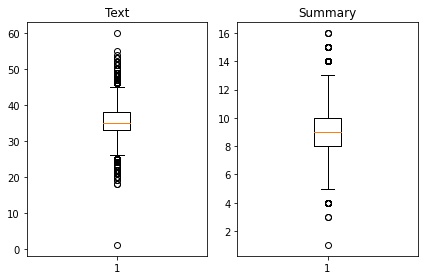

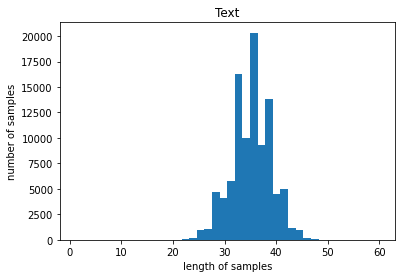

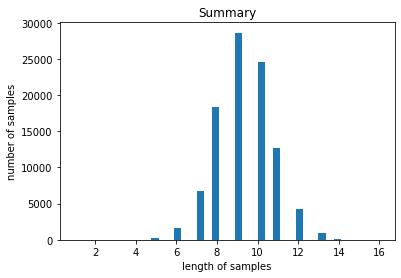

In [20]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('텍스트 길이 표준편차 : {}'.format(np.std(text_len)))

print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))
print('요약길이 표준편차 : {}'.format(np.std(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
# 평균 + 2표준편차 안에 들어가는 샘플 비율
def below_threshold_len(mean_len, std, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= mean_len + 2 * std):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(mean_len + 2 * std, (cnt / len(nested_list))))

In [22]:
below_threshold_len(35, 3.79, data['text'])
below_threshold_len(9.29, 1.39,  data['headlines'])

전체 샘플 중 길이가 42.58 이하인 샘플의 비율: 0.9750305002033347
전체 샘플 중 길이가 12.069999999999999 이하인 샘플의 비율: 0.9880337535583571


In [23]:
text_cut = 43
headlines_cut = 12

In [24]:
data = data[data.apply(lambda x: len(x['headlines'].split()) <= headlines_cut and len(x['text'].split()) <= text_cut, axis=1)]

In [25]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x) # 인풋 문장의 시작에 sostoken 추가
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken') # 타겟 문장의 끝에 eostoken 추가
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


In [26]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [27]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices) # 인코더 인덱스를 랜덤 셔플
print(indices)

[75275 23182 24920 ... 45263 30203 26636]


In [28]:
# 랜덤한 인덱스로 데이터가 셔플됨
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [29]:
# 훈련과 테스트를 8대 2로 나눔
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19187


In [30]:
decoder_input[:-n_of_val]

array(['sostoken year old mumbai teenage boy raped by teens for year',
       'sostoken billion people use at least one of facebook apps ceo',
       'sostoken cr money laundering racket busted in mumbai', ...,
       'sostoken visas for jadhav wife mother being processed pakistan',
       'sostoken trump name dropped from hotel in panama',
       'sostoken pm violated security protocol by flying in seaplane omar'],
      dtype=object)

In [31]:
decoder_target[:-n_of_val]

array(['year old mumbai teenage boy raped by teens for year eostoken',
       'billion people use at least one of facebook apps ceo eostoken',
       'cr money laundering racket busted in mumbai eostoken', ...,
       'visas for jadhav wife mother being processed pakistan eostoken',
       'trump name dropped from hotel in panama eostoken',
       'pm violated security protocol by flying in seaplane omar eostoken'],
      dtype=object)

In [32]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 76748
훈련 레이블의 개수 : 76748
테스트 데이터의 개수 : 19187
테스트 레이블의 개수 : 19187


In [33]:
# 케라스 토크나이저로 단어사전 만듬
# 굳이 단어 사전 축소 안 하고 전부 다 사용

src_vocab_size = len(encoder_input_train)
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [34]:
threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 68439
등장 빈도가 9번 이하인 희귀 단어의 수: 50314
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18125
단어 집합에서 희귀 단어의 비율: 73.51656219407063
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.612432321293948


In [35]:
# 케라스 토크나이저로 단어사전 만듬
# 희귀 단어 날리고 18000개로

src_vocab_size = 18000
src_tokenizer = Tokenizer(src_vocab_size) # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [36]:
# 디코더도 똑같이 진행 input train만 하면 eostoken이 빠지게됨

tar_vocab_size = len(decoder_input_train) + len(decoder_target_train)
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train+decoder_target_train)
# tar_tokenizer.fit_on_texts(decoder_input_train)
# word_count_d = pd.DataFrame(tar_tokenizer.word_counts.items(), columns=['word', 'count'])

In [37]:
threshold = 4
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 94002
등장 빈도가 3번 이하인 희귀 단어의 수: 75193
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18809
단어 집합에서 희귀 단어의 비율: 79.99085125848386
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.173735365141474


In [38]:
# 희귀 단어 날리고 18000개로

tar_vocab_size = 18000
tar_tokenizer = Tokenizer(tar_vocab_size)
tar_tokenizer.fit_on_texts(decoder_input_train+decoder_target_train)
# tar_tokenizer.fit_on_texts(decoder_input_train)

In [39]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [40]:
tar_word_to_index['eostoken']

2

In [41]:
tar_word_to_index['sostoken']

1

In [362]:
# # 케라스 토크나이저로 단어사전 만듬
# tar_vocab_size = len(word_count_d[word_count_d['count'] >= 2]['count'])
# tar_tokenizer = Tokenizer(tar_vocab_size) # 1번만 등장하는 단어는 빼고 단어집합 만듬
# tar_tokenizer.fit_on_texts(decoder_input_train)
# tar_vocab_size

In [42]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)
print(encoder_input_train[:3])

[[3, 13, 438, 978, 75, 329, 168, 441, 1566, 1503, 1277, 672, 17, 3, 184, 438, 6, 12789, 3561, 1695, 483, 1974, 635, 332, 1392, 43, 1075, 300, 1345, 9, 1], [131, 123, 522, 1567, 81, 70, 10, 229, 162, 17, 32, 1922, 131, 385, 877, 3990, 129, 1, 5854, 1312, 1722, 10, 2051, 2173, 743, 175, 454, 4255, 142, 1567, 4, 4231, 406, 127, 6306, 1787, 9016], [1830, 798, 681, 6097, 18, 180, 2346, 4567, 1097, 2706, 75, 61, 13166, 870, 3302, 96, 4568, 4837, 10809, 4922, 932, 1425, 586, 845, 18, 100, 4922, 83, 213, 18]]


In [43]:
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 45, 23, 68, 7637, 336, 524, 16, 4139, 5, 45], [1, 178, 61, 227, 11, 1754, 111, 6, 219, 1644, 73], [1, 46, 256, 2847, 2634, 3936, 4, 68], [1, 1928, 391, 104, 5, 99, 969, 4, 86, 1190], [1, 32, 825, 134, 305, 528, 172, 230, 7638, 2489]]
target
decoder  [[45, 23, 68, 7637, 336, 524, 16, 4139, 5, 45, 2], [178, 61, 227, 11, 1754, 111, 6, 219, 1644, 73, 2], [46, 256, 2847, 2634, 3936, 4, 68, 2], [1928, 391, 104, 5, 99, 969, 4, 86, 1190, 2], [32, 825, 134, 305, 528, 172, 230, 7638, 2489, 2]]


In [44]:
len(encoder_input_train), len(encoder_input_test)

(76748, 19187)

In [45]:
len(decoder_input_train), len(decoder_target_train), len(decoder_input_test), len(decoder_target_test)

(76748, 76748, 19187, 19187)

In [46]:
# token만 있는 것들 삭제
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 76748
훈련 레이블의 개수 : 76748
테스트 데이터의 개수 : 19187
테스트 레이블의 개수 : 19187


In [47]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_cut, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_cut, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_cut, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_cut, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_cut, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_cut, padding='post')

In [48]:
len(encoder_input_train), len(encoder_input_test)

(76748, 19187)

In [49]:
len(decoder_input_train), len(decoder_target_train), len(decoder_input_test), len(decoder_target_test)

(76748, 76748, 19187, 19187)

In [50]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, GRU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import AdditiveAttention

In [75]:
# 인코더 설계 시작
embedding_dim = 128
hidden_size = 128

# 인코더
encoder_inputs = Input(shape=(text_cut,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_gru1 = GRU(hidden_size, return_sequences=True, return_state=True, activation='silu')
encoder_output1, state_h1 = encoder_gru1(enc_emb)

encoder_gru2 = GRU(hidden_size, return_sequences=True, return_state=True, activation='silu')
encoder_output2, state_h2 = encoder_gru2(encoder_output1)

In [76]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab_size, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 GRU
decoder_gru1 = GRU(hidden_size, return_sequences=True, return_state=True,activation='silu')
decoder_outputs1, _ = decoder_gru1(dec_emb, initial_state=[state_h2])

decoder_gru2 = GRU(hidden_size, return_sequences=True, return_state=True,activation='silu')
decoder_outputs2, _ = decoder_gru2(decoder_outputs1, initial_state=[state_h2])

In [77]:
# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs2, encoder_output2])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs2, attn_out])

# 디코더의 출력층
dense1 = Dense(256, activation='silu')
dense_output1 = dense1(decoder_concat_input)
dropout_output1 = Dropout(0.5)(dense_output1)

dense2 = Dense(128, activation='silu')
dense_output2 = dense2(dropout_output1)
dropout_output2 = Dropout(0.5)(dense_output2)

decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(dropout_output2)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 43)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 43, 128)      2304000     input_9[0][0]                    
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
gru_12 (GRU)                    [(None, 43, 128), (N 99072       embedding_6[0][0]                
____________________________________________________________________________________________

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights = True)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=64, callbacks=[es], epochs=200)

Epoch 1/200
1200/1200 [==============================] - 308s 253ms/step - loss: 6.0990 - val_loss: 5.6616
Epoch 2/200
1200/1200 [==============================] - 303s 252ms/step - loss: 5.6637 - val_loss: 5.3625
Epoch 3/200
1200/1200 [==============================] - 300s 250ms/step - loss: 5.3826 - val_loss: 5.1123
Epoch 4/200
1200/1200 [==============================] - 300s 250ms/step - loss: 5.1297 - val_loss: 4.8885
Epoch 5/200
1200/1200 [==============================] - 302s 251ms/step - loss: 4.9250 - val_loss: 4.7314
Epoch 6/200
1200/1200 [==============================] - 299s 249ms/step - loss: 4.7553 - val_loss: 4.6118
Epoch 7/200
1200/1200 [==============================] - 299s 250ms/step - loss: 4.6091 - val_loss: 4.5180
Epoch 8/200
1200/1200 [==============================] - 300s 250ms/step - loss: 4.4792 - val_loss: 4.4591
Epoch 9/200
1200/1200 [==============================] - 297s 248ms/step - loss: 4.3622 - val_loss: 4.3910
Epoch 10/200
1200/1200 [=============

In [79]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output2, state_h2]) # 인코더 구조 그대로 들고옴

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h
decoder_outputs3, state_h3 = decoder_gru1(dec_emb2, initial_state=[decoder_state_input_h])
decoder_outputs4, state_h4 = decoder_gru2(decoder_outputs3, initial_state=[decoder_state_input_h])

# 어텐션 층(어텐션 함수)
decoder_hidden_state_input = Input(shape=(text_cut, hidden_size))

attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out_inf = attn_layer([decoder_outputs4, decoder_hidden_state_input])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_inf_concat = Concatenate(axis=-1, name='concat_layer')([decoder_outputs4, attn_out_inf])

# 디코더의 출력층
dense_output1_inf = dense1(decoder_inf_concat)
dropout_output1_inf = Dropout(0.5)(dense_output1_inf)

dense_output2_inf = dense2(dropout_output1_inf)
dropout_output2_inf = Dropout(0.5)(dense_output2_inf)

decoder_softmax_outputs = decoder_softmax_layer(dropout_output2_inf)

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h],
    [decoder_softmax_outputs] + [state_h4])


In [80]:
decoder_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 128)    2304000     input_10[0][0]                   
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
gru_14 (GRU)                    [(None, None, 128),  99072       embedding_7[1][0]                
                                                                 input_11[0][0]             

In [81]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    # input_seq = encoder_input_test[i].reshape(1, text_cut)
    e_out, e_h = encoder_model.predict(input_seq)

        # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h = decoder_model.predict([target_seq] + [e_out, e_h])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_cut-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h = h

    return decoded_sentence

In [82]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [83]:
def seq2headlines(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + tar_index_to_word[i]+' '
    return temp

In [84]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2headlines(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_cut)))
    print("\n")

원문 : year old employee jumped first floor building income tax raid questioning tamil nadu man complained nausea stepping balcony jumping officials immediately alerted police officials rushed private hospital 
실제 요약 : sostoken man jumps off the first floor during it raid and questioning 
예측 요약 :  man in mumbai hospital in cr in mumbai hospital


원문 : iifa press conference actress katrina kaif said please leave alia bhatt varun dhawan salman khan said journalists asked alia working salman film alia told journalists ask salman film joked trying get remake rights film called papa great 
실제 요약 : sostoken please leave alia for varun and salman for me jokes katrina 
예측 요약 :  do not most hai aamir on ranbir on ranbir on salman


원문 : infosys chairman nandan nilekani wife rohini nilekani said public pledge needed indian wealthy giving enough said must overcome cultural barriers giving private silent activity committed donate half estimated billion wealth charity joining giving pledge initiative

예측 요약 :  ipl cricket cricket cricket cricket cricket cricket cricket cricket cricket cricket


원문 : petrol price sunday cut paise per litre lowest level diesel price reduced paise nine month low petrol delhi costs per litre diesel litre petrol price decline since october amidst falling international oil prices rupee appreciation 
실제 요약 : sostoken petrol rate cut to its lowest in diesel at month low 
예측 요약 :  petrol prices in in fy lowest in petrol diesel in revenue


원문 : batsman ambati rayudu failed make six different squads named bcci duleep trophy india matches reportedly skipping yo yo test year old pulled india squad england odis june failing test later appear six week time period 
실제 요약 : rayudu not picked in squads by bcci for missing yo yo test 
예측 요약 :  cricket cricket cricket cricket cricket cricket cricket cricket cricket cricket cricket


원문 : models walked saris sixty fashion designers amazon fashion week show sari sari hood gloves among unique creations vogue show dhruv k

예측 요약 :  startup to be sold for for air air india flight to


원문 : cpi lost tripura assembly elections first time years congress leader jairam ramesh said demise left disaster india left change mind people aspirations society also changing added kerala state governed cpi 
실제 요약 : sostoken demise of the left will be disaster for india cong leader 
예측 요약 :  women will be in day in yrs in yrs old women


원문 : india per capita income average income earned per person grew last fiscal slowest pace six years nominal terms per capita income stood compared government data showed per capita income real terms fiscal grew 
실제 요약 : sostoken india per capita income grows slowest in years 
예측 요약 :  in days in days in days in days in days in


원문 : jury georgia us ordered security company pay billion damages woman raped employee teen lawyers representing victim raped claimed largest jury verdict awarded sexual assault case us 
실제 요약 : sostoken us woman raped as teen awarded billion in damages 
예측 요약 :

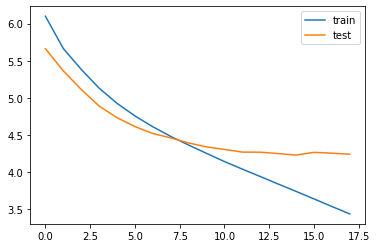

In [85]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [86]:
from summa.summarizer import summarize

In [87]:
for i in range(50, 100):
    sample_text = seq2text(encoder_input_test[i])
    print("원문 :", sample_text)
    print("추출 요약 :", summarize(sample_text, ratio=0.5))
    print("추상 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_cut)))
    print("\n")

원문 : year old employee jumped first floor building income tax raid questioning tamil nadu man complained nausea stepping balcony jumping officials immediately alerted police officials rushed private hospital 
추출 요약 : 
추상 요약 :  man in mumbai hospital in cr in mumbai hospital


원문 : iifa press conference actress katrina kaif said please leave alia bhatt varun dhawan salman khan said journalists asked alia working salman film alia told journalists ask salman film joked trying get remake rights film called papa great 
추출 요약 : 
추상 요약 :  do not most hai aamir on ranbir on ranbir on salman


원문 : infosys chairman nandan nilekani wife rohini nilekani said public pledge needed indian wealthy giving enough said must overcome cultural barriers giving private silent activity committed donate half estimated billion wealth charity joining giving pledge initiative 
추출 요약 : 
추상 요약 :  do not most expensive in india to be auctioned for


원문 : shiv sena said india capital shifted london tokyo pm narendra

추상 요약 :  my cricket is the test in the the the the the


원문 : telecom department said meet officials airtel idea vodafone hear pleas trai crore penalty trai recommended government impose penalty telcos allegedly denying sufficient interconnection points reliance jio jio complained large number calls network failed result 
추출 요약 : 
추상 요약 :  trai to be to pay on sale to pay tax to


원문 : ex australia opener matthew hayden smashed highest test score hours minutes zimbabwe hayden faced balls hit fours sixes broke ex windies captain brian lara year old record october hayden record broken lara smashed tests april 
추출 요약 : 
추상 요약 :  ipl runs in ipl record in ipl record in ipl runs


원문 : assam assembly passed three bills increasing monthly salary chief minister assembly speaker deputy speaker ministers mlas chief minister salary allowance hiked lakh lakh salaries mlas increased decision applicable month 
추출 요약 : 
추상 요약 :  farmers to farmers to mlas to farmers to farmers to farmers


원문 : talk